In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("bhatbhateni_synthetic_dataset_complex.csv")

In [5]:
df.shape

(11000, 15)

In [6]:
df.head()

,TransactionID,CustomerType,ProductCategory,Product,Quantity,PricePerUnit,TotalAmount,PaymentMethod,StoreLocation,Date,WeatherCondition,TrafficStatus,StoreMusicPlaying,EmployeeOnDuty,NearbyEvents
0,TX00001,Guest,Personal Care,Soap,1.0,1162.68,1162.68,Credit Card,Pokhara,1/1/2024 0:00,Sunny,Light,Rock,David,Political Rally
1,TX00002,Regular,Toys & Games,Rubik's Cube,1.0,1085.59,1085.59,Debit Card,Biratnagar,1/1/2024 1:00,Sunny,Light,Pop,Sarah,Concert
2,TX00003,NaN,Dairy Products,Condensed Milk,2.0,274.18,548.36,Cash,Chitwan,1/1/2024 2:00,Snowy,Light,No Music,David,NaN
3,TX00004,Guest,Dairy Products,Milk,1.0,837.96,837.96,Credit Card,Biratnagar,1/1/2024 3:00,Cloudy,Light,Jazz,Michael,NaN
4,TX00005,Regular,Electronics,Mobile Phone,1.0,1299.26,1299.26,Debit Card,Chitwan,NaN,Sunny,Light,Pop,John,Sports Event


In [7]:
# step dataset overview
print("dataset overview:")
print(f"total rows:{df.shape[0]}")
print(f"total columns:{df.shape[1]}")
print(f"total columns with missing values:/n{df.isnull().sum()}")

dataset overview:
total rows:11000
total columns:15
total columns with missing values:/nTransactionID           0
CustomerType          550
ProductCategory       550
Product               550
Quantity              545
PricePerUnit          600
TotalAmount           666
PaymentMethod         550
StoreLocation         550
Date                  550
WeatherCondition      550
TrafficStatus         550
StoreMusicPlaying     550
EmployeeOnDuty        550
NearbyEvents         2626
dtype: int64


In [8]:
df.describe()

,Quantity,TotalAmount
count,10455.000000,10334.000000
mean,6.285988,6333.755013
std,34.005450,39416.272699
min,1.000000,100.690000
25%,2.000000,1282.210000
50%,3.000000,2542.270000
75%,4.000000,4684.890000
max,497.000000,910071.240000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionID      11000 non-null  object 
 1   CustomerType       10450 non-null  object 
 2   ProductCategory    10450 non-null  object 
 3   Product            10450 non-null  object 
 4   Quantity           10455 non-null  float64
 5   PricePerUnit       10400 non-null  object 
 6   TotalAmount        10334 non-null  float64
 7   PaymentMethod      10450 non-null  object 
 8   StoreLocation      10450 non-null  object 
 9   Date               10450 non-null  object 
 10  WeatherCondition   10450 non-null  object 
 11  TrafficStatus      10450 non-null  object 
 12  StoreMusicPlaying  10450 non-null  object 
 13  EmployeeOnDuty     10450 non-null  object 
 14  NearbyEvents       8374 non-null   object 
dtypes: float64(2), object(13)
memory usage: 1.3+ MB


In [10]:
# handling in  missing values


In [38]:
def replace_null_with_zeros(df, columns):
    df[columns] = df[columns].fillna(0)
    return df

columns_to_replace = [
    "CustomerType", "ProductCategory", "Product", "Quantity", "PricePerUnit", 
    "TotalAmount", "PaymentMethod", 	"StoreLocation", "Date", "WeatherCondition",
    "TrafficStatus", "StoreMusicPlaying", "EmployeeOnDuty", "NearbyEvents"
]

# Corrected function call
df = replace_null_with_zeros(df, columns_to_replace)

print(df.head())


  TransactionID CustomerType ProductCategory         Product  Quantity  \
0       TX00001        Guest   Personal Care            Soap       1.0   
1       TX00002      Regular    Toys & Games    Rubik's Cube       1.0   
2       TX00003      Unknown  Dairy Products  Condensed Milk       2.0   
3       TX00004        Guest  Dairy Products            Milk       1.0   
4       TX00005      Regular     Electronics    Mobile Phone       1.0   

  PricePerUnit  TotalAmount PaymentMethod StoreLocation           Date  \
0      1162.68      1162.68   Credit Card       Pokhara  1/1/2024 0:00   
1      1085.59      1085.59    Debit Card    Biratnagar  1/1/2024 1:00   
2       274.18       548.36          Cash       Chitwan  1/1/2024 2:00   
3       837.96       837.96   Credit Card    Biratnagar  1/1/2024 3:00   
4      1299.26      1299.26    Debit Card       Chitwan              0   

  WeatherCondition TrafficStatus StoreMusicPlaying EmployeeOnDuty  \
0            Sunny         Light         


Metrics by Product Category:
Axes(0.125,0.11;0.775x0.77)


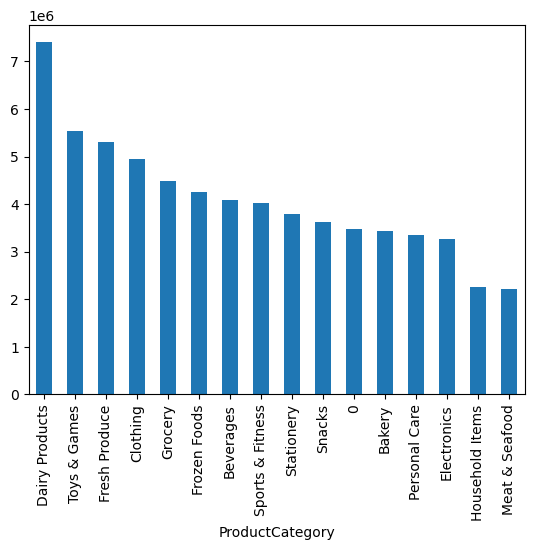

In [70]:
# Breakdown by Product Category
category_metrics = df.groupby("ProductCategory").agg(
    Total_Sales=("TotalAmount", "sum"),
    Average_Sales=("TotalAmount", "mean"),
    Total_Orders=("TransactionID", "count"),
).sort_values(by="Total_Sales", ascending=False)
print("\nMetrics by Product Category:")

#plotting in bar graph 
print(category_metrics['Total_Sales'].plot.bar())

In [72]:
# Check data types of the relevant columns
print(df[['Quantity', 'PricePerUnit', 'TotalAmount']].dtypes)

# Ensure all columns are numeric (convert non-numeric values to NaN)
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['PricePerUnit'] = pd.to_numeric(df['PricePerUnit'], errors='coerce')
df['TotalAmount'] = pd.to_numeric(df['TotalAmount'], errors='coerce')

# Fill NaN values (if necessary)
df['Quantity'] = df['Quantity'].fillna(0)
df['PricePerUnit'] = df['PricePerUnit'].fillna(0)
df['TotalAmount'] = df['TotalAmount'].fillna(0)

# Now try calculating statistics
print(f"Quantity: Ranges from {df['Quantity'].min()} to {df['Quantity'].max()} (Mean: {df['Quantity'].mean()})")
print(f"PricePerUnit: Ranges from {df['PricePerUnit'].min()} to {df['PricePerUnit'].max()} (Mean: {df['PricePerUnit'].mean()})")
print(f"TotalAmount: Ranges from {df['TotalAmount'].min()} to {df['TotalAmount'].max()} (Mean: {df['TotalAmount'].mean()})")

Quantity        float64
PricePerUnit    float64
TotalAmount     float64
dtype: object
Quantity: Ranges from 0.0 to 497.0 (Mean: 5.974545454545455)
PricePerUnit: Ranges from 0.0 to 1999.72 (Mean: 980.1457418181817)
TotalAmount: Ranges from 0.0 to 910071.24 (Mean: 5950.274936363637)


In [176]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Group by month, sum the TotalAmount for each period, and sort by Total_Sales
monthly_sales = df.groupby(df['Date'].dt.to_period("M")).agg(
    Total_Sales=("TotalAmount", "sum")
).sort_values(by="Total_Sales", ascending=False)

# Print the result
print("\nMonthly Sales Trends:")
print(monthly_sales)


Monthly Sales Trends:
         Total_Sales
Date                
2024-07   6040354.47
2024-10   5771763.17
2025-01   5560646.68
2024-05   4770780.00
2024-08   4770770.89
2024-04   4388254.05
2024-06   4324633.53
2024-09   4126446.45
2024-12   4019831.33
2025-02   3828707.76
2024-11   3794610.53
2024-02   3699095.86
2024-03   3545920.34
2024-01   3497616.87



Monthly Sales Trends:
         Total_Sales
Date                
2024-07   6040354.47
2024-10   5771763.17
2025-01   5560646.68
2024-05   4770780.00
2024-08   4770770.89
2024-04   4388254.05
2024-06   4324633.53
2024-09   4126446.45
2024-12   4019831.33
2025-02   3828707.76
2024-11   3794610.53
2024-02   3699095.86
2024-03   3545920.34
2024-01   3497616.87


AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

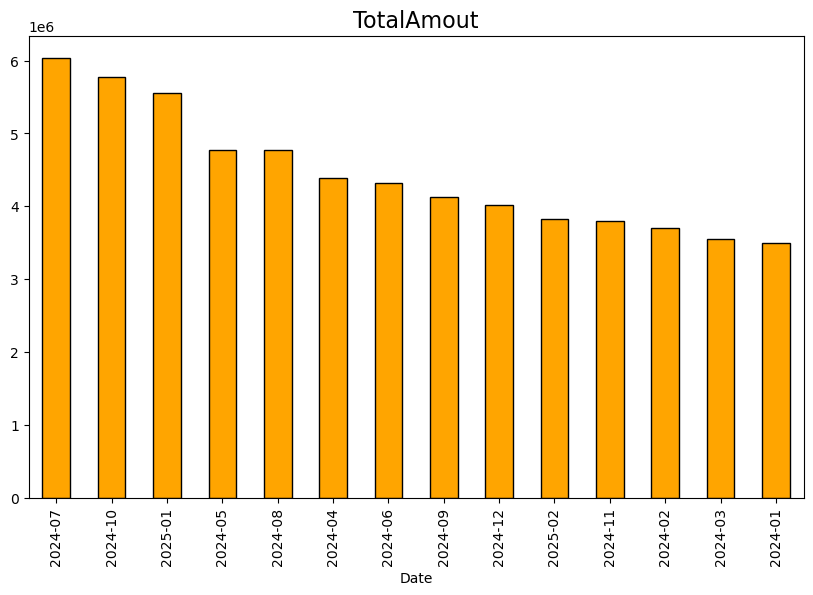

In [102]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Ensure 'TotalAmount' is numeric
df['TotalAmount'] = pd.to_numeric(df['TotalAmount'], errors='coerce')

# Fill NaN values in 'TotalAmount' if needed (optional)
df['TotalAmount'] = df['TotalAmount'].fillna(0)

# Group by month, sum the TotalAmount for each period, and sort by Total_Sales
monthly_sales = df.groupby(df['Date'].dt.to_period("M")).agg(
    Total_Sales=("TotalAmount", "sum")
).sort_values(by="Total_Sales", ascending=False)

# Print the result
print("\nMonthly Sales Trends:")
print(monthly_sales)


# ploting
plt.figure(figsize=(10,6))
monthly_sales["Total_Sales"].plot(kind="bar",color="orange",edgecolor="black")
plt.title("TotalAmout",fontsize=16)
plt.xlable("monthly sales trends",fontsize=17)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

In [120]:
# Group by 'StoreLocation', sum the 'TotalAmount', and sort by 'Total_Sales'
StoreLocation = df.groupby("StoreLocation").agg(
    Total_Sales=("TotalAmount", "sum")
).sort_values(by="Total_Sales", ascending=False)

# Print the result
print("\nSales by Store Location:")
print(StoreLocation)








Sales by Store Location:
               Total_Sales
StoreLocation             
Bhairahawa     15253764.92
Biratnagar     13768453.52
Chitwan        12389862.72
Kathmandu      11465192.95
Pokhara         9626011.30
0               2949738.89


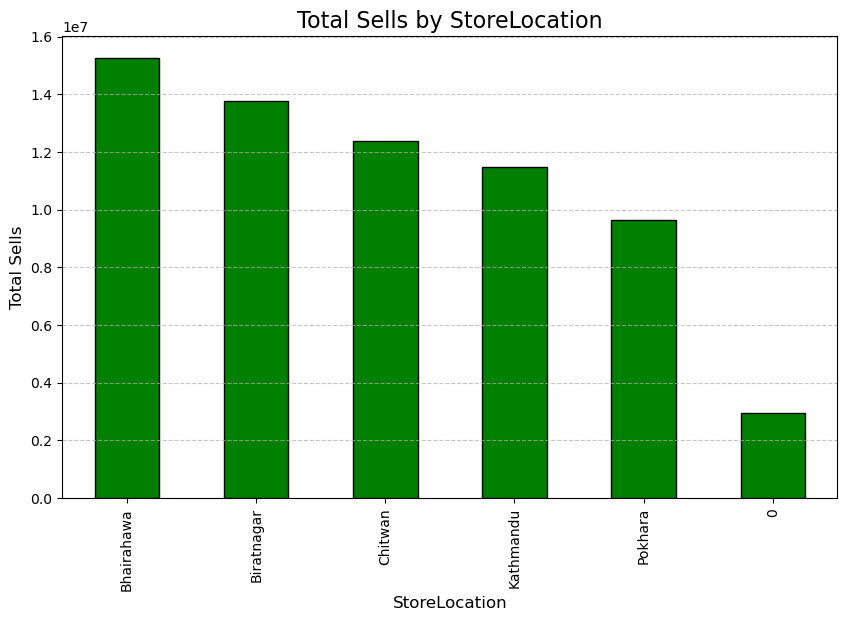

In [140]:

# Visualizing the Profit by Region
plt.figure(figsize=(10, 6))
StoreLocation["Total_Sales"].plot(kind='bar', color='green', edgecolor='black')
plt.title('Total Sells by StoreLocation', fontsize=16)
plt.xlabel('StoreLocation', fontsize=12)
plt.ylabel('Total Sells', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [134]:
# top 10 most selling items

top_selling_product =df.groupby("Product").agg(
    Total_Sales=("TotalAmount","sum"),
    Total_Quantity=("Quantity","count")
).sort_values(by="Total_Sales",ascending=False).head(10)

print("Top 10 product by Sale")
print(top_selling_product)

Top 10 product by Sale
                Total_Sales  Total_Quantity
Product                                    
0                3547397.54             550
Condensed Milk   1760479.78              66
Trousers         1618911.26              95
Frozen Soup      1420107.76              67
Yogurt           1274390.94              77
Paneer           1179756.57              68
Ginger           1135988.10              68
Beef Steak       1054741.57              67
Potato           1049818.12              59
Iced Tea         1036624.25              58


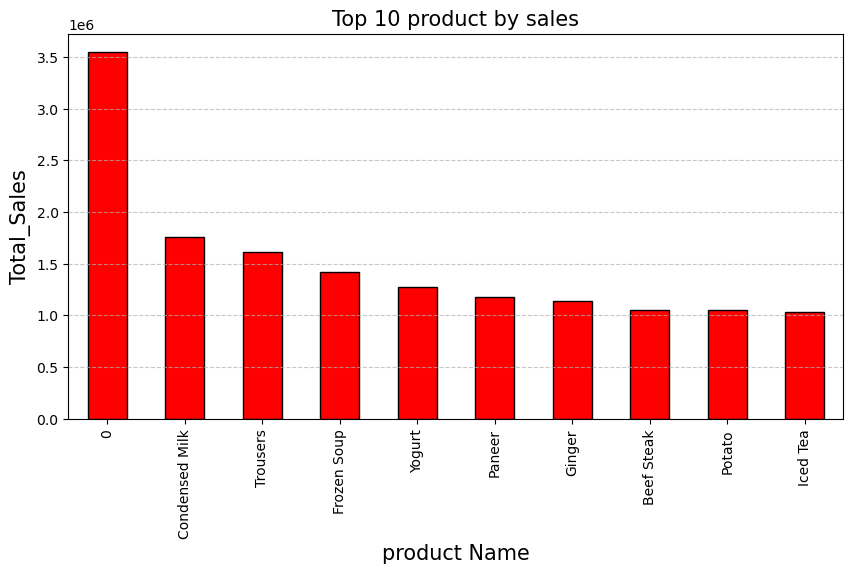

In [144]:
plt.figure(figsize=(10,5))
top_selling_product["Total_Sales"].plot(kind="bar",color="red",edgecolor="black")
plt.title("Top 10 product by sales",fontsize=15)
plt.xlabel("product Name",fontsize=15)
plt.ylabel("Total_Sales",fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [150]:
# sales by types of customer

Sales_by_customer = df.groupby("CustomerType").agg(
    Total_Sales = ("TotalAmount","sum"),
    Total_Quantity = ("Quantity","count")
).sort_values(by="Total_Sales", ascending= False).head(10)

print("Sales by types of customer")
print(Sales_by_customer)

Sales by types of customer
              Total_Sales  Total_Quantity
CustomerType                             
Member        24930439.14            3568
Regular       20640648.94            3337
Guest         18129209.98            3545
Unknown        1752726.24             550


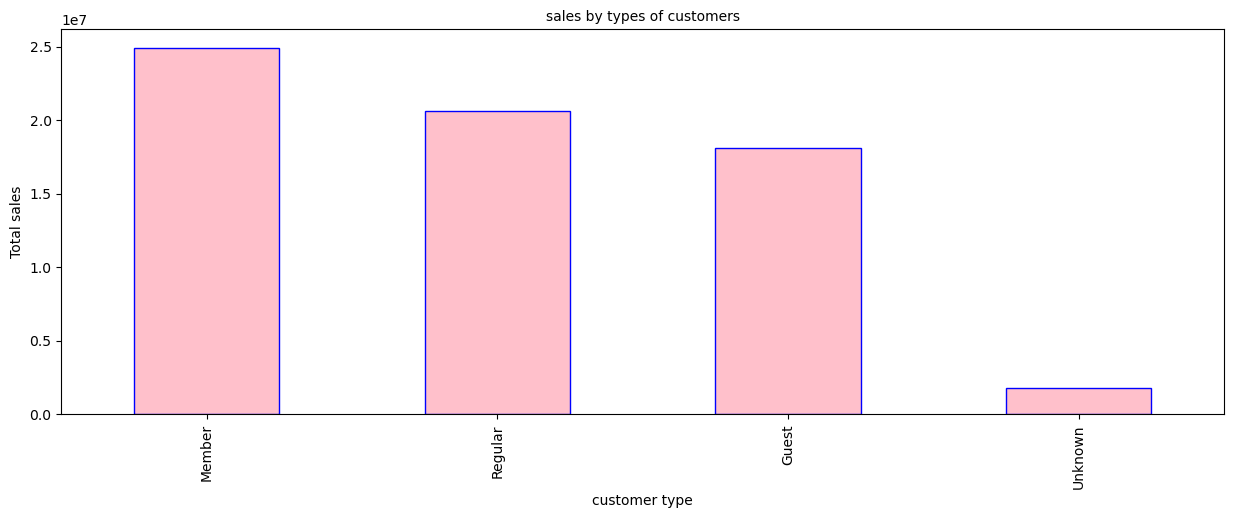

In [152]:
plt.figure(figsize=(15,5))
Sales_by_customer["Total_Sales"].plot(kind="bar",color = "pink",edgecolor="blue")
plt.title("sales by types of customers",fontsize=10)
plt.xlabel("customer type",fontsize=10)
plt.ylabel("Total sales",fontsize=10)
plt.show()

In [158]:
# SALES BY PAYMENT METHOD

Sales_by_PaymentMethod = df.groupby("PaymentMethod").agg(
    Total_Sales = ("TotalAmount","sum")
).sort_values(by="Total_Sales",ascending = False)


print("Sales by paymentMehod")
print(Sales_by_PaymentMethod)
    

Sales by paymentMehod
                Total_Sales
PaymentMethod              
Debit Card      17068970.18
Mobile Payment  16495161.44
Credit Card     15582307.42
Cash            13239501.39
0                3067083.87


AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

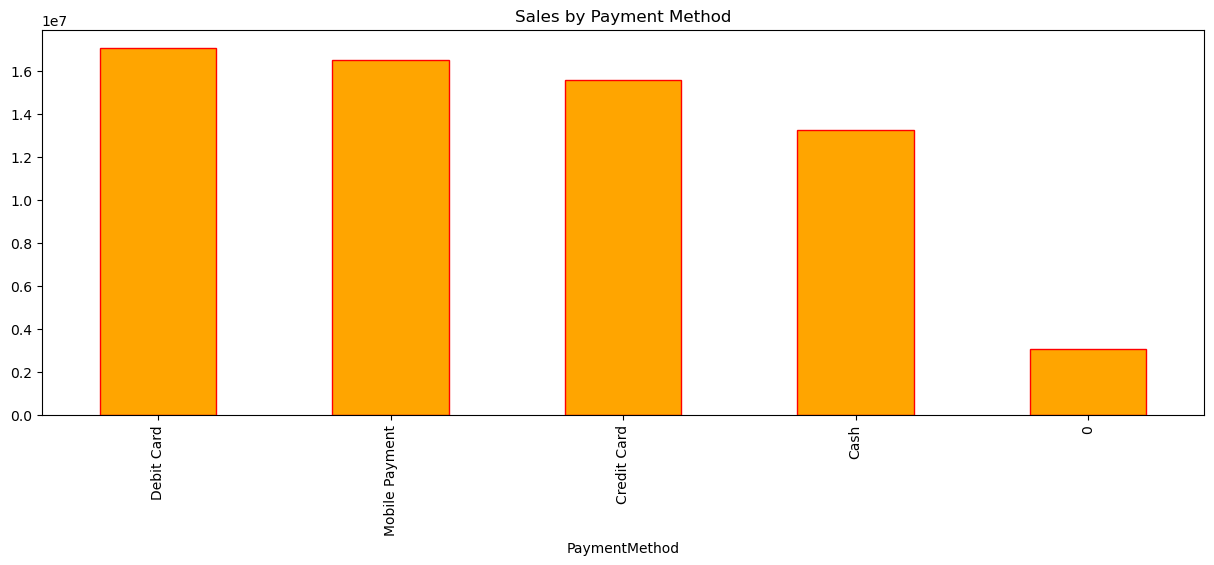

In [162]:
plt.figure(figsize=(15,5))
Sales_by_PaymentMethod["Total_Sales"].plot(kind="bar",color ="orange",edgecolor="red")
plt.title("Sales by Payment Method")
plt.xlable("Payment Method",fontsize=13)
plt.ylable("Total Sales",fontsize=15)
plt.show()

In [164]:
# Time Series Daily Sales Trends

df["Date"] = pd.to_datetime(df['Date'])
Daily_Sales = df.groupby(df['Date'].dt.to_period("d")).agg(
    Average_Daily_Sales =("TotalAmount","sum"),
    Average_Daily_Order=("TransactionID",'count')
)

print("Average Daily Sales and order")
print(Daily_Sales.mean())
                        

Average Daily Sales and order
Average_Daily_Sales    149015.424293
Average_Daily_Order        25.059952
dtype: float64


<Figure size 1500x500 with 0 Axes>

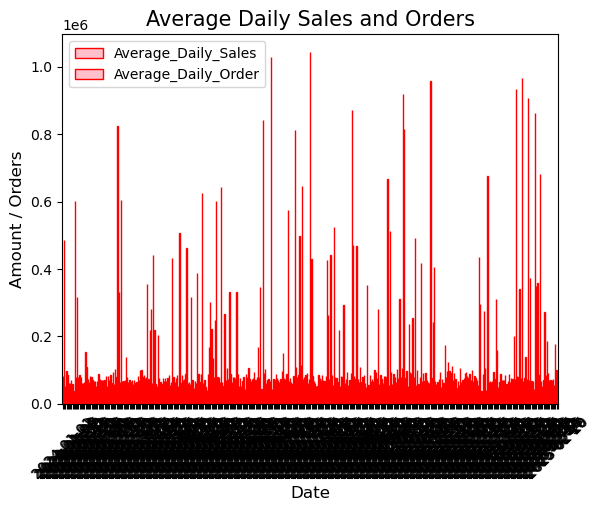

In [170]:
plt.figure(figsize=(15, 5))
Daily_Sales[['Average_Daily_Sales','Average_Daily_Order']].plot(kind="bar",color="pink",edgecolor="red")
plt.title("Daily Sales Trends")
plt.title("Average Daily Sales and Orders", fontsize=15)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Amount / Orders", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [172]:
#most selliing product based on store location 
top_selling= df.groupby("WeatherCondition").agg(
    top_product = ("TotalAmount",'sum')
).sort_values("top_product",ascending = False)
print(top_selling)

                  top_product
WeatherCondition             
Windy             14596668.42
Rainy             12818476.79
Sunny             12153452.49
Cloudy            11871289.54
Snowy             10533222.42
0                  3479914.64


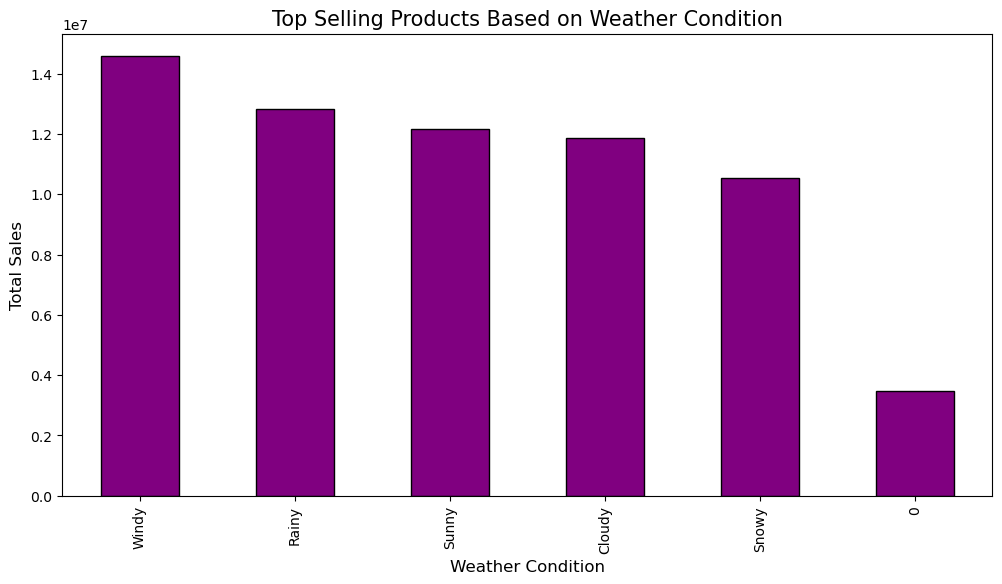

In [174]:
plt.figure(figsize=(12, 6)) 
top_selling["top_product"].plot(kind="bar", color="purple", edgecolor="black")
plt.title("Top Selling Products Based on Weather Condition", fontsize=15)
plt.xlabel("Weather Condition", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.show()